In [186]:
import pandas as pd
import tqdm as tq
from zipfile import ZipFile
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Global Initialisation
Input_ImgTrainPath='stage_2_test_images'
Output_ImgTrainPath='stage_2_train_images'

In [11]:
# Extracting Test X Ray Images
with ZipFile('stage_2_test_images.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path='stage_2_test_images')

In [12]:
# Extracting Train X Ray Images

with ZipFile('stage_2_train_images.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path='stage_2_train_images')

In [14]:
# Loading Input CSV files, train Labels and Detailed Class info Files
train_lables_df=pd.read_csv('stage_2_train_labels.csv')
train_detailclassinf_df=pd.read_csv('stage_2_detailed_class_info.csv')

In [15]:
train_lables_df.head()
# It contains Pateing id
# Starting Co ordinates(x,y), width,height for the bounding box.
# Target variable tells it has pneumonia or not.

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [31]:
train_detailclassinf_df.head()
#it has 3 Different Classes. 

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [48]:
train_detailclassinf_df['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [35]:
#Number of Unique Patients
train_lables_df.patientId.nunique()
# There are 26684 patient details

26684

In [134]:
# Appending the 2 Df into one, this will give more understanding of the class and Target variable.

Train_DetailedLable_df = pd.merge(train_lables_df, train_detailclassinf_df, on='patientId',how='left')
Train_DetailedLable_df.drop_duplicates(inplace=True)
Train_DetailedLable_df.reset_index(inplace=True)

In [135]:
Train_DetailedLable_df.tail()

,index,patientId,x,y,width,height,Target,class
30222,37621,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1,Lung Opacity
30223,37623,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0,Normal
30224,37624,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0,Normal
30225,37625,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1,Lung Opacity
30226,37627,c1f7889a-9ea9-4acb-b64c-b737c929599a,233.0,424.0,201.0,356.0,1,Lung Opacity


In [136]:
Train_DetailedLable_df.count()


index        30227
patientId    30227
x             9555
y             9555
width         9555
height        9555
Target       30227
class        30227
dtype: int64

In [155]:
# Class info for Pneumonia and Non Pneumonia cases
print ('Class Info for Pnuemonia Cases: \n',Train_DetailedLable_df[Train_DetailedLable_df.Target==1]['class'].value_counts())
print('\n\n')
print ('Class Info for Non Pnuemonia Cases: \n',Train_DetailedLable_df[Train_DetailedLable_df.Target==0]['class'].value_counts())


Class Info for Pnuemonia Cases 
 Lung Opacity    9555
Name: class, dtype: int64



Class Info for Non Pnuemonia Cases 
 No Lung Opacity / Not Normal    11821
Normal                           8851
Name: class, dtype: int64


In [158]:
# Bounding Boxes  info for Pneumonia and Non Pneumonia cases
print ('BB Info for Pnuemonia Cases: \n',Train_DetailedLable_df[Train_DetailedLable_df.Target==1]['x'].count())
print('\n\n')
print ('BB Info for Non Pnuemonia Cases: \n',Train_DetailedLable_df[Train_DetailedLable_df.Target==0]['x'].count())


BB Info for Pnuemonia Cases 
 9555



BB Info for Non Pnuemonia Cases 
 0


This Means that, if Lung Opacity is present, it indicates Pneunomonia and vice versa.  
Without Opacity in Lungs, the X ray can be normal/not Normal.   

if Pneumonia, there is Bounding Box and for Non pneumonia cases, there is no Bounding Box

In [164]:
Train_DetailedLable_df.isna().sum()

index            0
patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [167]:
Train_DetailedLable_df.isnull().sum()

index            0
patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [166]:
Train_DetailedLable_df.Target.value_counts()

0    20672
1     9555
Name: Target, dtype: int64

No NA and Null Values in the Given Data set.

In [168]:
Train_DetailedLable_df.describe()

,index,x,y,width,height,Target
count,30227.000000,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
mean,19034.244649,394.047724,366.839560,218.471376,329.269702,0.316108
std,10751.968651,204.574172,148.940488,59.289475,157.750755,0.464963
min,0.000000,2.000000,2.000000,40.000000,45.000000,0.000000
25%,9916.500000,207.000000,249.000000,177.000000,203.000000,0.000000
50%,18876.000000,324.000000,365.000000,217.000000,298.000000,0.000000
75%,28742.000000,594.000000,478.500000,259.000000,438.000000,1.000000
max,37627.000000,835.000000,881.000000,528.000000,942.000000,1.000000


# Understanding the Duplicate entries in Data

In [169]:
Train_DetailedLable_df['patientId'].value_counts().head(10)

3239951b-6211-4290-b237-3d9ad17176db    4
ee820aa5-4804-4984-97b3-f0a71d69702f    4
1bf08f3b-a273-4f51-bafa-b55ada2c23b5    4
0d5bc737-03de-4bb8-98a1-45b7180c3e0f    4
32408669-c137-4e8d-bd62-fe8345b40e73    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d    4
7d674c82-5501-4730-92c5-d241fd6911e7    4
76f71a93-8105-4c79-a010-0cfa86f0061a    4
Name: patientId, dtype: int64

In [170]:
Train_DetailedLable_df[Train_DetailedLable_df['patientId'] == '32408669-c137-4e8d-bd62-fe8345b40e73']


,index,patientId,x,y,width,height,Target,class
2495,3433,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
2496,3437,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
2497,3441,32408669-c137-4e8d-bd62-fe8345b40e73,300.0,367.0,226.0,423.0,1,Lung Opacity
2498,3445,32408669-c137-4e8d-bd62-fe8345b40e73,706.0,360.0,232.0,238.0,1,Lung Opacity


In [173]:
# number of patient ids having multiple id's with there count of entries
Train_DetailedLable_df['patientId'].value_counts().value_counts()

1    23286
2     3266
3      119
4       13
Name: patientId, dtype: int64

There are 13 Patientids with 4 entries and so on. 

In [175]:
# getting the same count for Target wise.. i.e with Pneumonia
Train_DetailedLable_df[Train_DetailedLable_df['Target'] == 1]['patientId'].value_counts().value_counts()

2    3266
1    2614
3     119
4      13
Name: patientId, dtype: int64

In [176]:
# Without Pneunmonia
Train_DetailedLable_df[Train_DetailedLable_df['Target'] == 0]['patientId'].value_counts().value_counts()

1    20672
Name: patientId, dtype: int64

 So patient Id's , without Pneunmonia doesnt have multiple entries.  
 Only patient id with Pneunmonia have multiple entries and they correspond to multiple BOunding boxes

# EDA on the Bounding Box Co ordinates

In [181]:
Train_BB_df=Train_DetailedLable_df[['x','y','width','height']]
Train_BB_df.head()

,x,y,width,height
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,264.0,152.0,213.0,379.0


In [182]:
Train_BB_df.count()

x         9555
y         9555
width     9555
height    9555
dtype: int64

In [184]:
Train_BB_df.describe()

,x,y,width,height
count,9555.000000,9555.000000,9555.000000,9555.000000
mean,394.047724,366.839560,218.471376,329.269702
std,204.574172,148.940488,59.289475,157.750755
min,2.000000,2.000000,40.000000,45.000000
25%,207.000000,249.000000,177.000000,203.000000
50%,324.000000,365.000000,217.000000,298.000000
75%,594.000000,478.500000,259.000000,438.000000
max,835.000000,881.000000,528.000000,942.000000


By Looking at the mean,std and max.. it seems that there are some outliers. We have to see what are they.

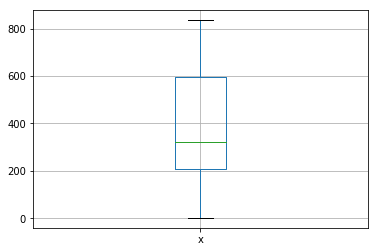

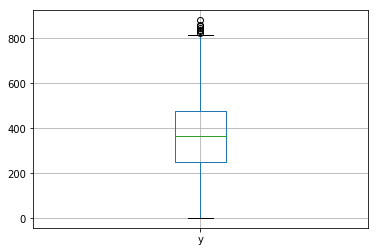

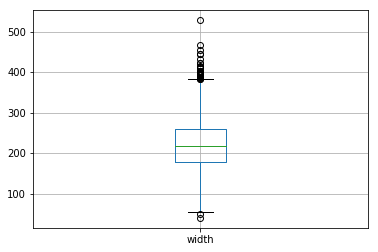

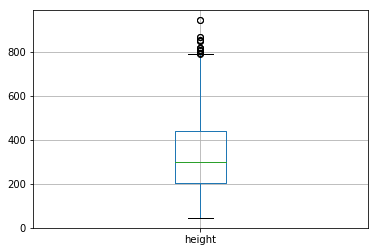

In [188]:
# Box Plot
for column in Train_BB_df:
    plt.figure()
    Train_BB_df.boxplot([column])
